In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [3]:
dataset = pd.read_csv('DriverData.csv')
X = dataset.iloc[:, [2, 3]].values

In [8]:
dataset.shape

(30, 5)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User ID   30 non-null     int64 
 1   Gender    30 non-null     object
 2   Score1    30 non-null     int64 
 3   Score2    30 non-null     int64 
 4   Category  30 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [9]:
dataset.isnull().sum()

User ID     0
Gender      0
Score1      0
Score2      0
Category    0
dtype: int64

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [5]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

C:\Users\sauds\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


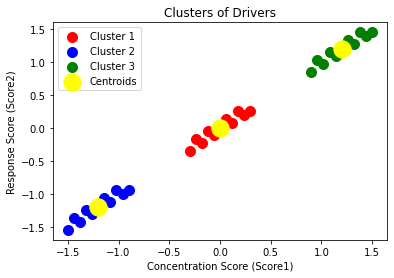

In [6]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Drivers')
plt.xlabel('Concentration Score (Score1)')
plt.ylabel('Response Score (Score2)')
plt.legend()
plt.show()